<a href="https://colab.research.google.com/github/bilzard/JQuants-news/blob/main/Ex01_JQuants_news_evaluation_1st_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

評価期間第一週のコンペ参加者のスコアの分布をプロットしてみたので共有します。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

リーダーボードをコピー＆ペーストして作った表を読み込みます。

In [3]:
lb_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JPX_Competition/JQuants-news_leaderboard.csv')

In [19]:
lb_df = lb_df.replace({'-': np.nan}).dropna()

In [25]:
lb_df.head()

,順位,チーム名 / ユーザ名,推論時間 (sec),暫定評価,最終評価 ▼,投稿件数,投稿日時,term
0,1,Ken.Ken.,5198.650,25701.3,-6114.4,1,2021-05-17 19:26:15,1
1,2,nakayasu,5112.404,60157.0,-12551,5,2021-05-17 19:26:14,1
2,3,FYSignate1009,332.109,27829.0,-16534,3,2021-05-17 17:54:05,1
3,4,takyan,6481.370,23375.0,-17608,3,2021-05-17 19:36:04,1
4,5,client_first,11.917,87766.3,-19128.9,15,2021-05-17 17:51:20,1


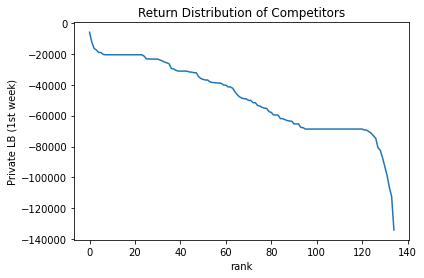

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(df)
ax.set_xlabel('rank')
ax.set_ylabel('Private LB (1st week)')

ax.title.set_text('Return Distribution of Competitors')

第一週のPrivate LB のスコアをプロットします。
全体的にマイナスとなりました。
中央値は-4.8万、トップ10%のスコアは-2.0万です。
-2.0万円と-6.8万円付近にあるピークは、チュートリアルのモデルをそのまま提出したユーザの一群とおもわれます。

mean: -48286
std: 23399
p90: -20675
median: -48685


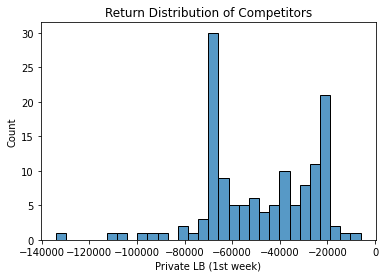

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.histplot(df, bins=30, ax=ax)
ax.set_xlabel('Private LB (1st week)')
ax.title.set_text('Return Distribution of Competitors')

print(f'mean: {df.mean():.0f}')
print(f'std: {df.std():.0f}')
print(f'p90: {df.quantile(.9):.0f}')
print(f'median: {df.median():.0f}')

Private LB と Public LB の相関をプロットしてみます。
スピアマンの相関係数が-0.263と、負の相関がみられます。
Private LB のスコアが高いモデルは、リターンの期待値が大きくリスクの大きいポートフォリオを組んでいると思うので、ロスしたときのマイナスも大きいと考えると、妥当な結果だと思います。

Spearman's ro: -0.263


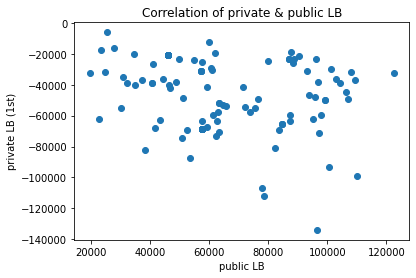

In [23]:
df1 = lb_df['暫定評価'].astype(float)
df2 = lb_df['最終評価 ▼'].replace({'-': np.nan}).astype(float)

corr = np.corrcoef(df1, df2)[1][0]
ro, _ = stats.spearmanr(df1, df2)
plt.scatter(df1, df2)
plt.xlabel('public LB')
plt.ylabel('private LB (1st)')
plt.title('Correlation of private & public LB')
print(f'Spearman\'s ro: {ro:.3f}')

すべてのモデルがマイナス評価を出しているため、2021/05/10週には今までの市場とは特異なことが起きたのが想像できます。

市場が全体的にマイナスとなった原因についての考察はファイナンスの専門家に委ねます。